In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data preprocessing

In [49]:
df=pd.read_csv('winequality-red.csv')

In [50]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [51]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


DATA VISUALISATION

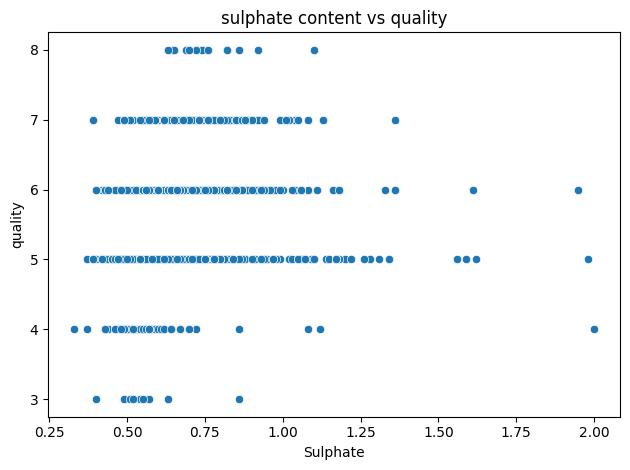

In [52]:
#scatter plot of sulphate with quality check
sns.scatterplot(x='sulphates',y='quality',data=df)
plt.xlabel("Sulphate")
plt.ylabel("quality")
plt.title("sulphate content vs quality")
plt.tight_layout()
plt.show()

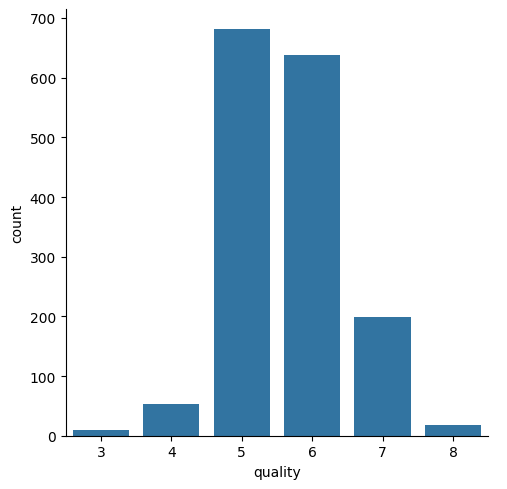

In [53]:
sns.catplot(x='quality',data=df,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

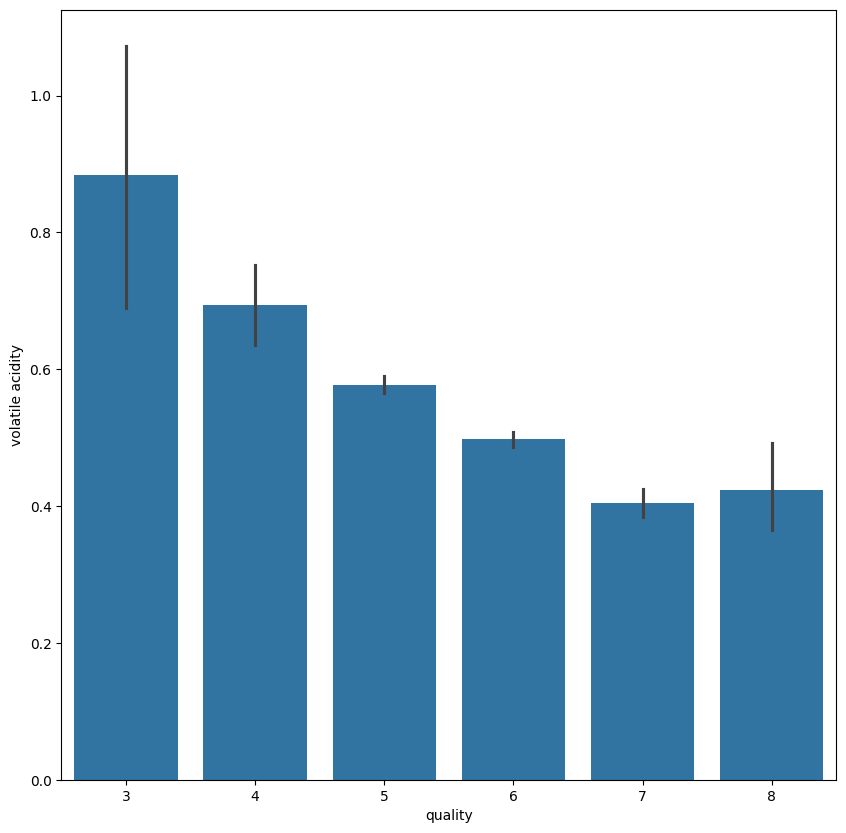

In [54]:
#volatile acidity vs quality
plt.figure(figsize=(10,10))
sns.barplot(x='quality',y='volatile acidity',data=df)

In [55]:
#Correlation
correlation=df.corr()

<Axes: >

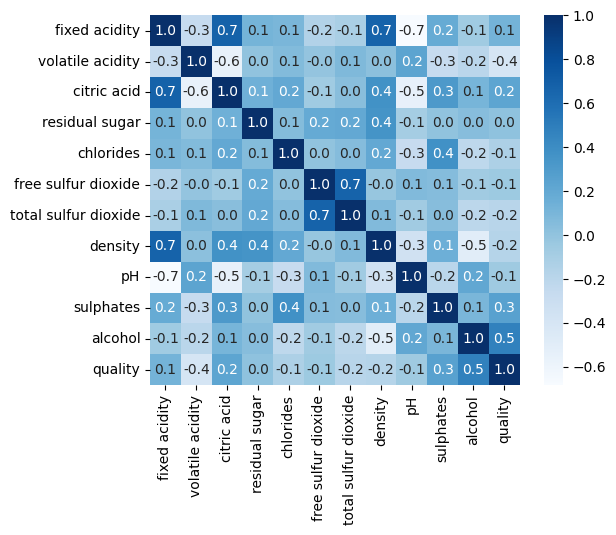

In [56]:
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.1f',cmap='Blues')

In [57]:
#note column of quality where value ranges from 3-8 so i want to replace 3-6 ranging values are bad,while 7-8 are good
# Step 1: Convert numeric quality to "good"/"bad"
# Step 2: Map "good"/"bad" to 1/0
df["quality"] = df["quality"].apply(lambda x: 0 if x <= 6 else 1)

In [58]:
df["quality"].value_counts()

,count
quality,
0,1382
1,217


Test & train split

In [59]:
X=df.drop(columns='quality',axis=1)
y=df['quality']

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


model evaluation

In [62]:
classifier=RandomForestClassifier()

In [63]:
classifier.fit(X_train,y_train)

RandomForestClassifier()

Model Evaluation

In [65]:
train_data_prediction = classifier.predict(X_train)
train_data_accuracy = accuracy_score(y_train, train_data_prediction)
print(train_data_accuracy)

1.0


In [66]:
test_data_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, test_data_prediction)
print(test_data_accuracy)

0.928125


Building a predictive System

In [69]:
input_data=(7.4,0.62,0.05,1.9,0.068,24.0,42.0,0.9961,3.42,0.57,11.5)
input_data_as_numpy=np.asarray(input_data)
input_data_reshaped = input_data_as_numpy.reshape(1, -1)
prediction = classifier.predict(input_data_reshaped)
print("Raw prediction:", prediction)

if prediction[0] == 1:
    print("✅ The wine has good quality")
else:
    print("❌ The wine has bad quality")

Raw prediction: [0]
❌ The wine has bad quality


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
